In [23]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import scatterplot_solution_1, scatterplot_solution_2

In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [24]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a _scatter plot_ to depict the data. What is the general relationship between these variables? Are there any points that appear unusual against these trends?

In [ ]:
# YOUR CODE HERE

In [ ]:
# run this cell to check your work against ours
scatterplot_solution_1()

**Task 2**: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

In [ ]:
# YOUR CODE HERE

In [ ]:
# run this cell to check your work against ours
scatterplot_solution_2()

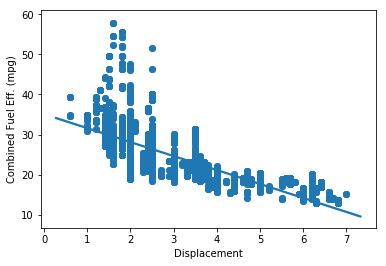

In [5]:
sb.regplot(data = fuel_econ, x = 'displ',y = 'comb')
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. (mpg)');

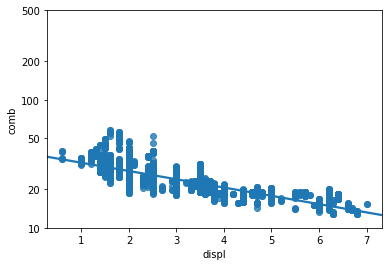

In [8]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs);

In [15]:
np.power(10, np.log10(3))

3.0

In [14]:
np.log10(3)

0.47712125471966244

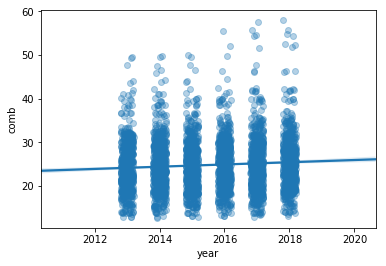

In [21]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb',
          x_jitter = 0.2,y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

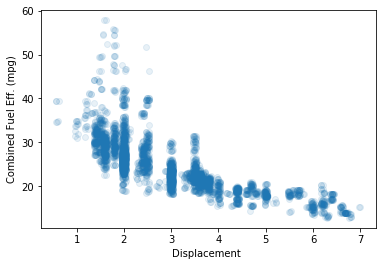

In [28]:
sb.regplot(data = fuel_econ, x = 'displ',y = 'comb',
          x_jitter = 0.04,y_jitter = 0.04,scatter_kws = {'alpha' : 1/10}, fit_reg = False)
plt.xlabel('Displacement ')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

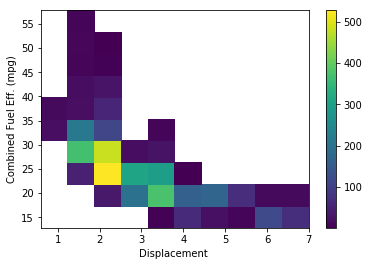

In [31]:
plt.hist2d(data = fuel_econ, x = 'displ',y = 'comb', cmin = 0.5)
plt.colorbar()
plt.xlabel('Displacement ')
plt.ylabel('Combined Fuel Eff. (mpg)')

In [33]:
fuel_econ[['comb','displ']].describe()

,comb,displ
count,3929.000000,3929.000000
mean,24.791339,2.950573
std,6.003246,1.305901
min,12.821700,0.600000
25%,20.658100,2.000000
50%,24.000000,2.500000
75%,28.227100,3.600000
max,57.782400,7.000000


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

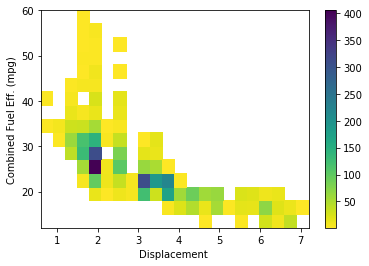

In [35]:
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ',y = 'comb', cmin = 0.5, bins = [bins_x,bins_y],cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('Displacement ')
plt.ylabel('Combined Fuel Eff. (mpg)')